# Part II - Effects of Borrower and Listing Features on Prosper Loan Distributions
## by Adaora Asika

## Investigation Overview

> In this investigation, I wanted to look at the effect of selected borrower demograpics and loan listing features on Prosper Loan Distributions. The main focus was on `Loan Category`,`Borrower APR`, and `Credit Rating`. 

## Dataset Overview

> The original dataset contains 113,937 loan listings with 81 variables for each loan. After wrangling data points were removed due to inconsistencies, missing information or irrelevance to the analysis being conducted.This analysis will focus on a subset of 38,006 loan listings in the dataset with 16 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData_clean.csv')

In [3]:
# convert date columns to datetime data type
df['ClosedDate']=pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])

In [4]:
# express APR in percentage
df['APRPct'] = df.BorrowerAPR.apply(lambda x: x * 100)

In [5]:
#I will create a function that will rename x,y axis and chart title.
sns.set_style('dark', {'xtick.bottom': True})
base_color=sns.color_palette('Paired_r', 6)[4]

In [6]:
#I will create a function that will rename x,y axis and chart title.
def chart_labels(x_label,y_label,title):
    plt.title(title, pad=20, fontsize=15)
    plt.xlabel(x_label,labelpad=15, fontsize=15)
    plt.ylabel(y_label, labelpad=10, fontsize=15)

In [7]:
# Convert CredRating to an ordered categorical variable
Ratings = ['AA','A','B','C','D','E','HR']
Credratings = pd.api.types.CategoricalDtype(ordered=True, categories=Ratings)
df['CredRating'] = df['CredRating'].astype(Credratings);

## Univariate Analysis: Distribution of Loan amounts

> Loan Amount in the dataset has a wide range of values, from 1000 to 35000 dollars. Limiting the x-axis clearly shows that the highest frequencies are approximately 25% and 26% for amounts between 1000 to 3000 and 3000 to 5000 repectively i.e over 50% have the smallest loan values.

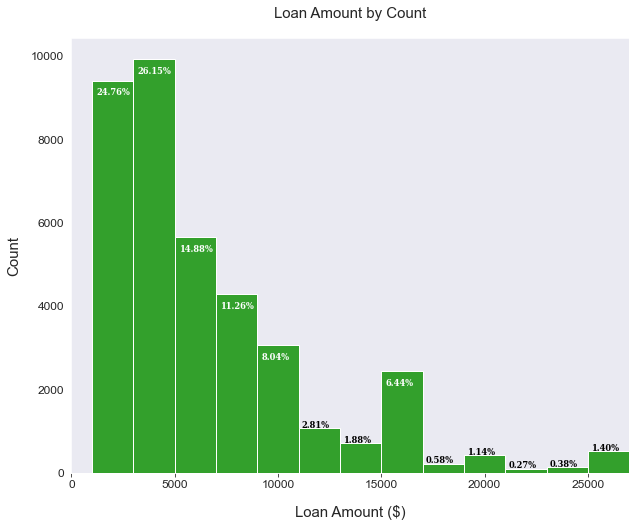

In [8]:
plt.figure(figsize=(10,8))

binsize = 1000
bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+ binsize, 2000)
n,bins,rect = plt.hist(df.LoanOriginalAmount, bins=bin_edges, color=base_color)
n = n[:-4]
bins = bins[:-4]
rect = rect[:-4]


plt.hist(df.LoanOriginalAmount, bins=bin_edges, color=base_color)
points=sum(n)

ax = plt.gca()
for index in range(len(rect)):
    loc=bins[index]
    count=n[index]
    percent=int(n[index])/points*100
    if percent>5:
        ax.text(loc+200,count-350,'{:0.2f}%'.format(percent), 
                 color = 'w',fontweight='bold',fontfamily='serif',fontsize='small')
    else:
        ax.text(loc+150,count+10,'{:0.2f}%'.format(percent), 
                 color='k',fontweight='bold',fontfamily='serif',fontsize='small') 
        
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12)
plt.xlim((0,27000));

chart_labels('Loan Amount ($)','Count','Loan Amount by Count');

## Univariate Analysis: Distribution of Listings within Loan Categories

> Borrowers took loans for `Debt Consolidation`, `Business` and `Other` purposes.

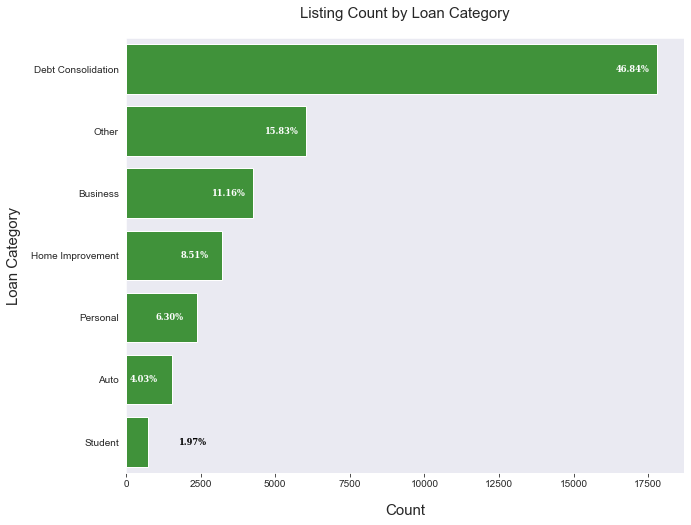

In [9]:
plt.figure(figsize = [10, 8])

order = df['LoanCategory'].value_counts().index[:7]
counts = df['LoanCategory'].value_counts()[:7]
n = df['LoanCategory'].value_counts().sum()

sns.countplot(data=df, y='LoanCategory', color=base_color, order=order);


for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    if percent>=2:
        plt.text(count-1400, i, '{:0.2f}%'.format(percent), va = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(count+1000, i, '{:0.2f}%'.format(percent), va = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
chart_labels('Count','Loan Category','Listing Count by Loan Category')

## Univariate Analysis: Distribution of Listings by Borrower Occupation

> The `Professional` category has the largest portion of listing Occupations, this is followed closely by the `Other` category, a distant third is Service and Sales.

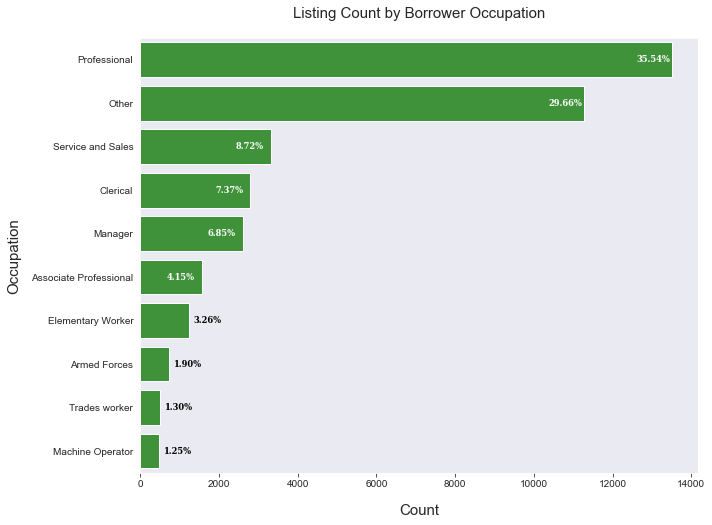

In [10]:
plt.figure(figsize = [10, 8])

order = df['Occupation'].value_counts().index
counts = df['Occupation'].value_counts()
n = df['Occupation'].value_counts().sum()

sns.countplot(data=df, y='Occupation', color=base_color, order=order);


for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    if percent>=4:
        plt.text(count-900, i, '{:0.2f}%'.format(percent), va = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(count+100, i, '{:0.2f}%'.format(percent), va = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Count','Occupation','Listing Count by Borrower Occupation')

## Univariate Analysis: Distribution of Listings by States(Top 10)

> The Top 10 states make up over `50%` of the listing distribution. The state with the highest number of listings is `California`, where there were over `5096` listings

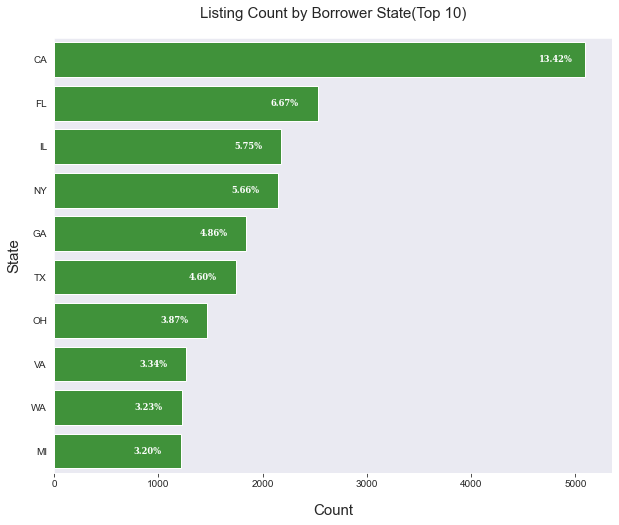

In [11]:
plt.figure(figsize = [10, 8])

order = df['BorrowerState'].value_counts().index[:10]
counts = df['BorrowerState'].value_counts()[:10]
n = df['BorrowerState'].value_counts().sum()

sns.countplot(data=df, y='BorrowerState', color=base_color, order=order);


for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    plt.text(count-450, i, '{:0.2f}%'.format(percent), va = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')

chart_labels('Count','State','Listing Count by Borrower State(Top 10)')

## Univariate Analysis: Distribution of Listings by Loan Status

> The bulk of the loans (`69%`) are in `Completed` status.

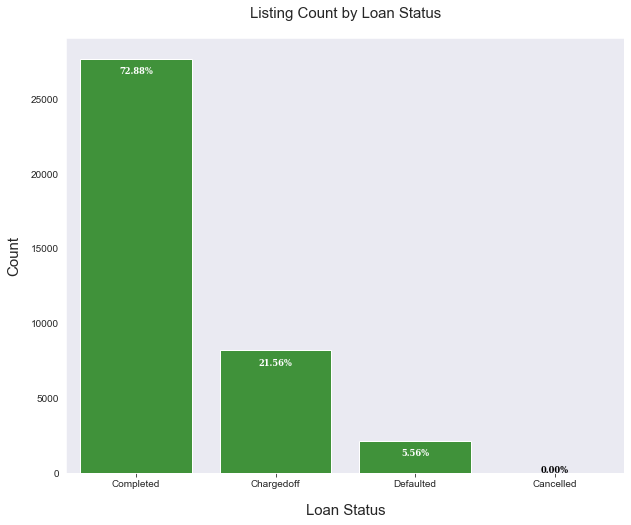

In [12]:
plt.figure(figsize = [10, 8])

n = df['LoanStatus'].value_counts().sum()
counts = df['LoanStatus'].value_counts()
order =counts.index
sns.countplot(data=df, x='LoanStatus', color=base_color, order=order);

locs, labels = plt.xticks(rotation=0) 

for loc, label in zip(locs, labels):
    count = counts[loc]
    percent = int(count)/n*100
    if percent>=5:
        plt.text(loc, count-1000, '{:0.2f}%'.format(percent), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(loc, count-10, '{:0.2f}%'.format(percent), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Loan Status','Count','Listing Count by Loan Status')

## Univariate Analysis: Distribution of Listings by Employment Status

> The employment status distribution shows over `95%` of borrowers were in `Full, Self or Part Time` employment,`Not employed` borrowers are approxcimately `1%` of the distribution.

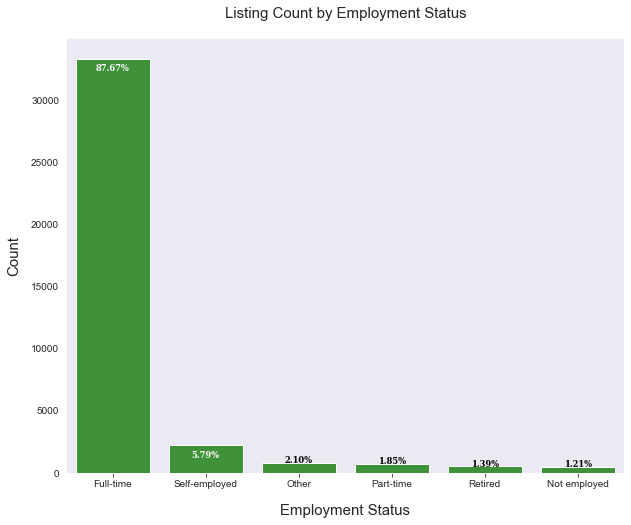

In [13]:
plt.figure(figsize = [10, 8])

n = df['EmploymentStatus'].value_counts().sum()
counts = df['EmploymentStatus'].value_counts()
order =counts.index
sns.countplot(data=df, x='EmploymentStatus', color=base_color, order=order);

locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = counts[loc]
    percent = int(count)/n*100
    if percent>=5:
        plt.text(loc, count-1000, '{:0.2f}%'.format(percent), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(loc, count-10, '{:0.2f}%'.format(percent), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Employment Status','Count','Listing Count by Employment Status')

## Univariate Analysis: Distribution of Listings by Borrower Credit Rating

> The credit rating with the most amount of listings is `D` while `AA` has the least amount.

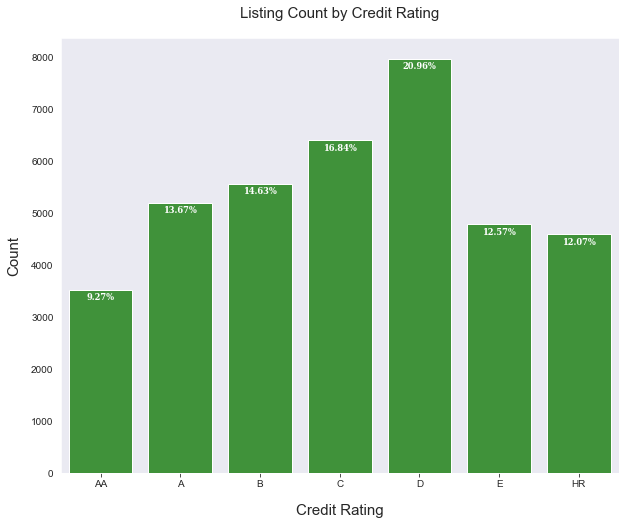

In [14]:
plt.figure(figsize = [10, 8])


n = df['CredRating'].value_counts().sum()
counts = df['CredRating'].value_counts().loc[[i for i in Ratings]]
sns.countplot(data=df, x='CredRating', color=base_color);

locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = counts[loc]
    percent = int(count)/n*100
    if percent>=5:
        plt.text(loc, count-200, '{:0.2f}%'.format(percent), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(loc, count-10, '{:0.2f}%'.format(percent), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Credit Rating','Count','Listing Count by Credit Rating')

## Univariate Analysis: Summary

#### Borrower features have showed that borrowers who were professionals in full time employment from California top the highest listing frequency and the top listing frequency by credit ranking is D and not AA.

#### Listing features have showed that the bulk of listings are in Completed status, listing amounts were mostly between 1000 and 5000  and the most common loan category was debt consolidation. 

## Bivariate Analysis: Relationship between Loan Amount and Borrower Occupation

> In the univariate exploration, professional job holders had the highest in listing frequency, while Managers ranked 5th, this chart shows that managers and trades workers-who ranked 9th, have slightly higher median Loan amount.

> However, all occupations show a wide spread of outlying variables beyond the whiskers of the boxplot with professionals having the highest spread followed by other job holders, this is more consistent with what was observed in the univariate exploration.

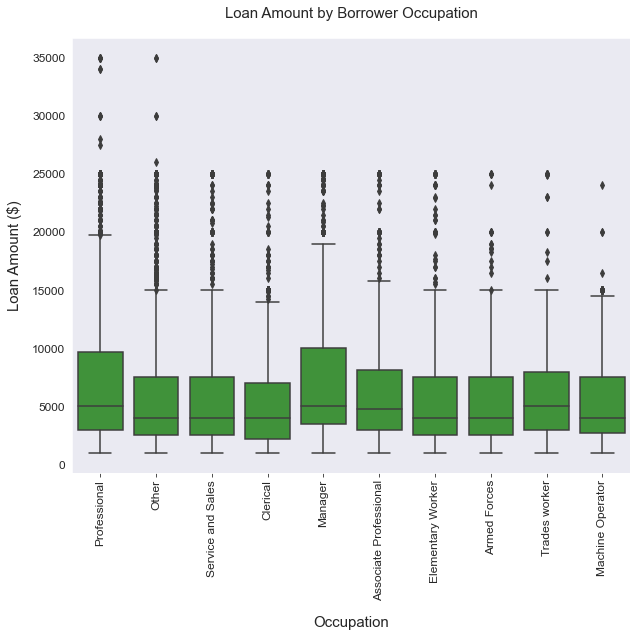

In [15]:
plt.figure(figsize=(10, 8))

order = df['Occupation'].value_counts().index

ax = sns.boxplot(x='Occupation', y='LoanOriginalAmount',data=df, 
                 color=base_color, order=order, orient='v');

plt.xticks(fontsize = 12, rotation=90);
plt.yticks(fontsize = 12);
chart_labels('Occupation','Loan Amount ($)','Loan Amount by Borrower Occupation')

## Bivariate Analysis: Effect of Borrowers Credit Rating on Listing Frequency in the top 5 Borrower States.

> There was mostly no effect on listing frequency as in each state except New York and Illinois, the frequency of the credit ratings mirrors those observed in univariate exploration.

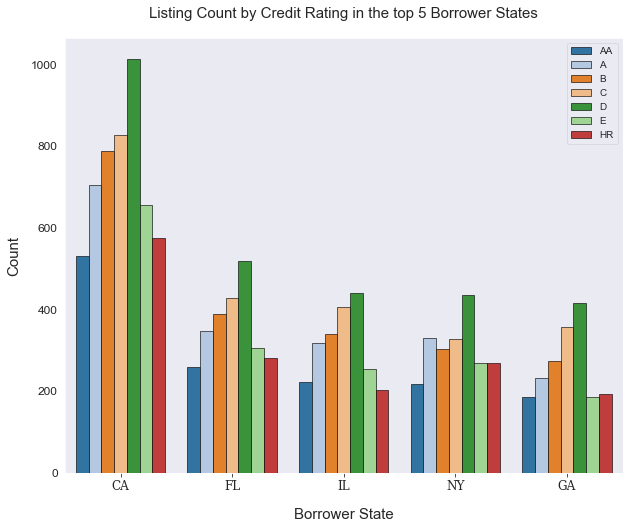

In [16]:
plt.figure(figsize=(10, 8))

top5_state_sub=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:5])]
order=df.BorrowerState.value_counts().index[0:5]

ax = sns.countplot(data=top5_state_sub, x='BorrowerState',palette='tab20',
             hue='CredRating', edgecolor='k', linewidth=0.6,
             order=order)
ax.legend(framealpha = 0.5)

locs, labels = plt.xticks()
plt.xticks(locs, labels, fontfamily='serif')

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Borrower State','Count','Listing Count by Credit Rating in the top 5 Borrower States')

## Bivariate Analysis: Relationship between Loan Amount and Borrower Credit Rating

> The median loan amount in each credit rating is below 7000 dollars and this decreases with credit rating as lower rating ranks have median loan amounts at 5000 dollars or below, this is consistent with small loan amounts that have been observed.

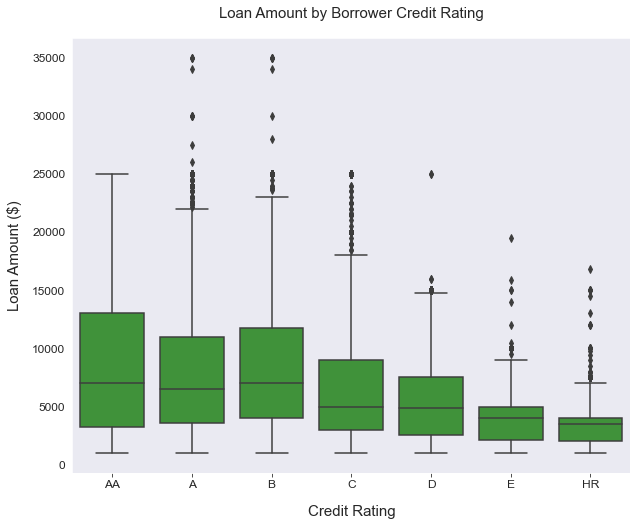

In [17]:
plt.figure(figsize=(10, 8))


ax = sns.boxplot(x='CredRating', y='LoanOriginalAmount',data=df, 
                 color=base_color, orient='v');

         
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Credit Rating','Loan Amount ($)','Loan Amount by Borrower Credit Rating')

## Bivariate Analysis: Summary

### The major relationship observed was between credit rating and loan amount. I observed the median loan amount decrease as credit rating ranks decreased.

## Multivariate Analysis: Effect of Borrower APR on Loan Amount Distribution across Credit Rating

> It shows that the higher a borrowers credit rating, the lower the APR rate on a loan listing.

> For A and AA credit rating, the loan amount distribution is concentrated on loan values below 10,000 dollars but APR rates differ, they are under 10% for credit rating AA and under 15% for credit rating A.

> Concentration of loan amounts for Credit ratings C,D,E, and HR start above APR of 20%.

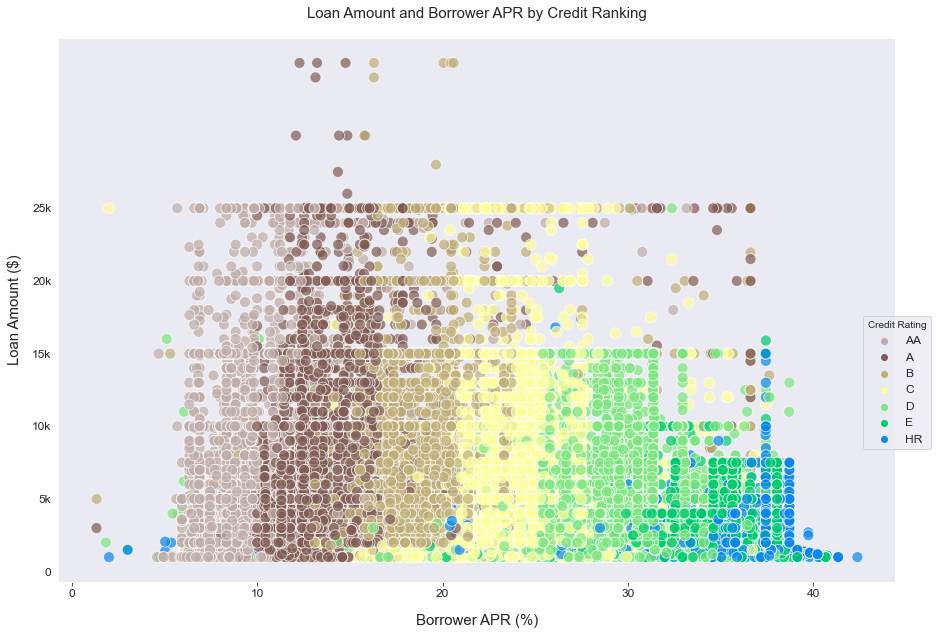

In [18]:
plt.figure(figsize=(15, 10))

ax = sns.scatterplot(x='APRPct', y='LoanOriginalAmount', data=df,
                    hue='CredRating', s=120, edgecolor='w', 
                    palette='terrain_r', alpha = 0.7); 

plt.legend(loc='best', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large', title = 'Credit Rating' )
plt.yticks([0,5000,10000,15000,20000,25000],['0','5k','10k','15k','20k','25k'])


plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Borrower APR (%)','Loan Amount ($)','Loan Amount and Borrower APR by Credit Ranking')

## Multivariate Analysis: Conclusion

> Through univariate, bivariate and multivariate explorations, I was able to look at features pertaining to Prosper borrowers and loan listings in the dataset to study their influences on Prosper loan distributions and my conclusion is that:

### Loan Category,Borrower APR, and Credit Rating are the features with the most effect on Prosper Loan listing distributions.